In [1]:
%matplotlib inline

import os
import json
import matplotlib.pyplot as plt
import numpy as np

from alignednotemodel.PitchDistribution import hz_to_cent, cent_to_hz
from alignednotemodel import alignednotemodel

import pdb

In [2]:
folder = 'ussak--sazsemaisi--aksaksemai----dede_salih_efendi'
pitchfile = os.path.join(folder, 'pitch_corrected.json')
notefile = os.path.join(folder, 'alignedNotes.json')
tonicfile = os.path.join(folder, 'tonic.json')
tuningfile = os.path.join(folder, 'tuning.json')

modelsavefile = os.path.join(folder, 'noteModels.json')

In [3]:
pitch = json.load(open(pitchfile, 'r'))
alignednotes = json.load(open(notefile, 'r'))['notes']
tonic = json.load(open(tonicfile, 'r'))['scoreInformed']
tuning = json.load(open(tuningfile, 'r'))['scoreInformed']

In [4]:
noteModels, pitchDistibution, newTonic = alignednotemodel.getModels(pitch, alignednotes, tonic, 
                                                                    tuning, kernel_width=7.5)


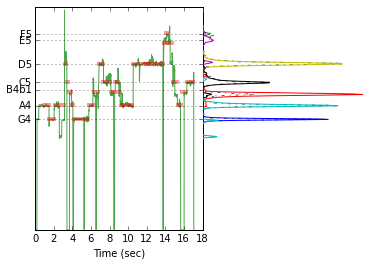

In [5]:
pitch = np.array(pitch)

fig, (ax1, ax2) = plt.subplots(1,2,sharey=True)
ax1.plot(pitch[:,0], pitch[:,1], 'g', label='Pitch', alpha = 0.7)
fig.subplots_adjust(wspace=0)
ax1.set_xlabel('Time (sec)')
ax1.yaxis.grid(True)
for note in alignednotes:
    ax1.plot(note['Interval'], cent_to_hz(
            [note['Pitch']['Value'], note['Pitch']['Value']], tonic['Value']), 
            'r', alpha=0.4, linewidth=4) 

ax2.plot(pitchDistibution.vals, pitchDistibution.bins, '-.', color='#606060')
for key in noteModels.keys():
    ax2.plot(noteModels[key]['distribution']['vals'], noteModels[key]['distribution']['bins'], 
             label=key)

ax2.set_yticklabels(noteModels.keys())
ax2.set_yticks([nm['stablepitch']['Value'] for nm in noteModels.values()])
ax2.axis('off')
ax2.yaxis.grid(True)

ax2.set_xticklabels([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

plt.show()

In [6]:
#for note in noteModels['C5']['notes']:
#    plt.plot(note['trajectory'][:,0], note['trajectory'][:,1])
#    plt.show()

In [7]:
#fig, ax = plt.subplots()
#ax.plot(pitchDistibution.bins, pitchDistibution.vals, '-.', color='#606060')
#for key in noteModels.keys():
#    ax.plot(noteModels[key]['distribution'].bins, noteModels[key]['distribution'].vals, label=key)
#legend = ax.legend(loc='upper right') 
#plt.show()